In [38]:
import pandas as pd


In [39]:
weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [40]:
print(weather)

                STATION                                  NAME  ACMH  ACSH  \
DATE                                                                        
1960-01-01  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
1960-01-02  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
1960-01-03  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
1960-01-04  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
1960-01-05  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
...                 ...                                   ...   ...   ...   
2022-01-24  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2022-01-25  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2022-01-26  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2022-01-27  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2022-01-28  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   

In [41]:
weather.apply(pd.isnull).sum()/weather.shape[0] # % null values contains by each features

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

In [42]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [43]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [44]:
core_weather

precip  snow  snow_depth  temp_max  temp_min
DATE                                                    
1960-01-01     0.0   0.0         0.0      49.0      30.0
1960-01-02     0.0   0.0         0.0      49.0      29.0
1960-01-03     0.0   0.0         0.0      54.0      35.0
1960-01-04     0.0   0.0         0.0      54.0      36.0
1960-01-05     0.0   0.0         0.0      55.0      33.0
...            ...   ...         ...       ...       ...
2022-01-24     0.0   NaN         NaN      60.0      39.0
2022-01-25     0.0   NaN         NaN      57.0      43.0
2022-01-26     0.0   NaN         NaN      57.0      41.0
2022-01-27     0.0   NaN         NaN      67.0      39.0
2022-01-28     0.0   NaN         NaN      64.0      39.0

[16859 rows x 5 columns]

## Filling Missing Values

In [45]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0] # % null values contains by each features

precip        0.016668
snow          0.324990
snow_depth    0.317634
temp_max      0.000534
temp_min      0.000593
dtype: float64

In [46]:
core_weather["snow"].value_counts()

snow
0.0    11379
1.0        1
Name: count, dtype: int64

In [47]:
# here snow was fallen only one day and rest of all other days are no snow fall
del core_weather["snow"]

In [48]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0    11504
Name: count, dtype: int64

In [49]:
# here snow was fallen only one day and rest of all other days are no snow fall
del core_weather["snow_depth"]

In [50]:
core_weather[pd.isnull(core_weather["precip"])]

precip  temp_max  temp_min
DATE                                  
1983-10-29     NaN      67.0      57.0
1983-10-30     NaN      70.0      63.0
1983-10-31     NaN      69.0      61.0
1983-11-12     NaN      63.0      55.0
1983-11-13     NaN      60.0      50.0
...            ...       ...       ...
2013-12-15     NaN      58.0      33.0
2016-05-01     NaN      80.0      55.0
2016-05-02     NaN      68.0      53.0
2016-05-08     NaN      67.0      56.0
2017-10-28     NaN      68.0      50.0

[281 rows x 3 columns]

In [51]:
core_weather.loc["1983-10-20":"1983-11-05", :]

precip  temp_max  temp_min
DATE                                  
1983-10-20    0.00      73.0      52.0
1983-10-21    0.00      70.0      50.0
1983-10-22    0.00      70.0      50.0
1983-10-23    0.00      69.0      60.0
1983-10-24    0.00      73.0      58.0
1983-10-25    0.00      75.0      53.0
1983-10-26    0.00      79.0      53.0
1983-10-27    0.00      82.0      56.0
1983-10-28    0.00      74.0      56.0
1983-10-29     NaN      67.0      57.0
1983-10-30     NaN      70.0      63.0
1983-10-31     NaN      69.0      61.0
1983-11-01    0.26      69.0      60.0
1983-11-02    0.06      68.0      56.0
1983-11-03    0.00      68.0      56.0
1983-11-04    0.00      67.0      55.0
1983-11-05    0.00      66.0      51.0

In [52]:
core_weather["precip"].value_counts()

precip
0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: count, Length: 176, dtype: int64

In [53]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [54]:
core_weather[pd.isnull(core_weather["temp_min"])]

precip  temp_max  temp_min
DATE                                  
2004-11-20     0.0       NaN       NaN
2011-12-21     0.0      61.0       NaN
2011-12-22     0.0      62.0       NaN
2011-12-23     0.0      56.0       NaN
2011-12-24     0.0      55.0       NaN
2011-12-25     0.0      54.0       NaN
2013-06-16     0.0       NaN       NaN
2020-08-29     0.0       NaN       NaN
2020-09-08     0.0       NaN       NaN
2020-09-09     0.0       NaN       NaN

In [55]:
core_weather = core_weather.fillna(method="ffill")

/tmp/ipykernel_2653/3127936549.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method="ffill")


In [56]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0] # % null values contains by each features

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [57]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [58]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [59]:
core_weather.index = pd.to_datetime(core_weather.index)

In [60]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [61]:
core_weather.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int32', name='DATE', length=16859)

In [62]:
core_weather.index.month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='DATE', length=16859)

In [63]:
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

## Analyzing the dataset

<Axes: xlabel='DATE'>

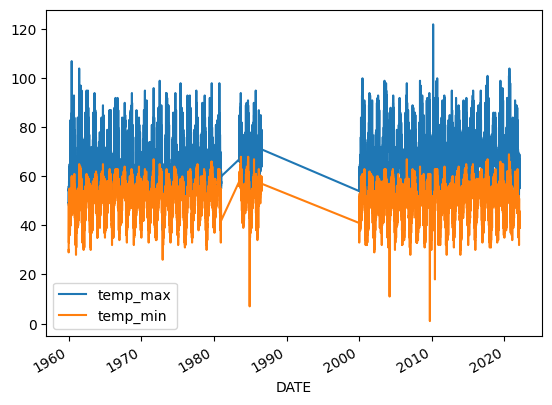

In [64]:
core_weather[["temp_max", "temp_min"]].plot()

In [65]:
core_weather.index.year.value_counts().sort_index()

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: count, dtype: int64

<Axes: xlabel='DATE'>

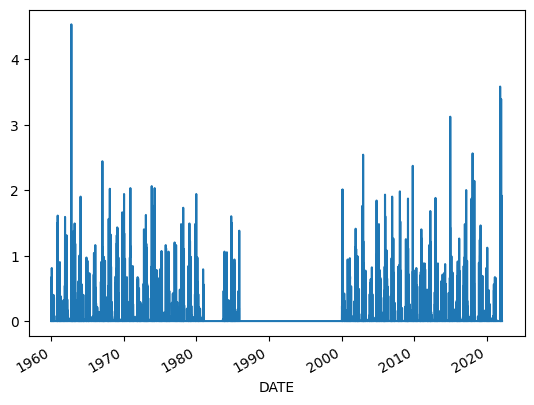

In [66]:
core_weather["precip"].plot()

<Axes: xlabel='DATE'>

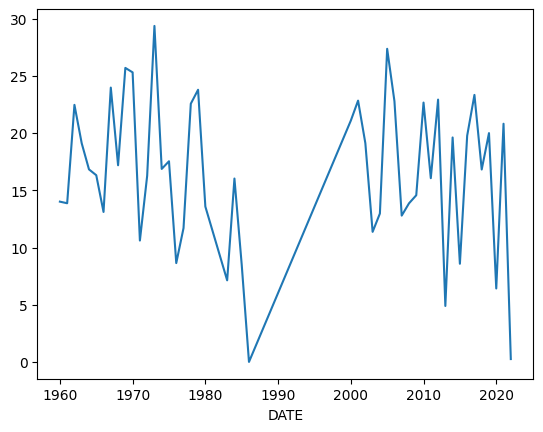

In [67]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [69]:
# Our goal is to predict the maximum temperature of tomorrow based on the today's data.
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [70]:
core_weather

precip  temp_max  temp_min  target
DATE                                          
1960-01-01     0.0      49.0      30.0    49.0
1960-01-02     0.0      49.0      29.0    54.0
1960-01-03     0.0      54.0      35.0    54.0
1960-01-04     0.0      54.0      36.0    55.0
1960-01-05     0.0      55.0      33.0    53.0
...            ...       ...       ...     ...
2022-01-24     0.0      60.0      39.0    57.0
2022-01-25     0.0      57.0      43.0    57.0
2022-01-26     0.0      57.0      41.0    67.0
2022-01-27     0.0      67.0      39.0    64.0
2022-01-28     0.0      64.0      39.0     NaN

[16859 rows x 4 columns]

In [71]:
core_weather = core_weather.iloc[:-1,:].copy()

In [72]:
core_weather

precip  temp_max  temp_min  target
DATE                                          
1960-01-01     0.0      49.0      30.0    49.0
1960-01-02     0.0      49.0      29.0    54.0
1960-01-03     0.0      54.0      35.0    54.0
1960-01-04     0.0      54.0      36.0    55.0
1960-01-05     0.0      55.0      33.0    53.0
...            ...       ...       ...     ...
2022-01-23     0.0      60.0      41.0    60.0
2022-01-24     0.0      60.0      39.0    57.0
2022-01-25     0.0      57.0      43.0    57.0
2022-01-26     0.0      57.0      41.0    67.0
2022-01-27     0.0      67.0      39.0    64.0

[16858 rows x 4 columns]

## Building Model

In [74]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [75]:
predictors = ["precip", "temp_max", "temp_min"]

In [76]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [77]:
train

precip  temp_max  temp_min  target
DATE                                          
1960-01-01    0.00      49.0      30.0    49.0
1960-01-02    0.00      49.0      29.0    54.0
1960-01-03    0.00      54.0      35.0    54.0
1960-01-04    0.00      54.0      36.0    55.0
1960-01-05    0.00      55.0      33.0    53.0
...            ...       ...       ...     ...
2020-12-27    0.00      63.0      44.0    61.0
2020-12-28    0.10      61.0      42.0    60.0
2020-12-29    0.00      60.0      39.0    56.0
2020-12-30    0.07      56.0      36.0    62.0
2020-12-31    0.06      62.0      44.0    60.0

[16467 rows x 4 columns]

In [78]:
test

precip  temp_max  temp_min  target
DATE                                          
2021-01-01    0.00      60.0      40.0    57.0
2021-01-02    0.14      57.0      51.0    56.0
2021-01-03    0.00      56.0      49.0    62.0
2021-01-04    0.36      62.0      46.0    59.0
2021-01-05    0.00      59.0      42.0    59.0
...            ...       ...       ...     ...
2022-01-23    0.00      60.0      41.0    60.0
2022-01-24    0.00      60.0      39.0    57.0
2022-01-25    0.00      57.0      43.0    57.0
2022-01-26    0.00      57.0      41.0    67.0
2022-01-27    0.00      67.0      39.0    64.0

[391 rows x 4 columns]

In [79]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [80]:
predictions = reg.predict(test[predictors])

In [81]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

20.56066854811876

In [82]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [83]:
combined

actual  predictions
DATE                           
2021-01-01    57.0    59.806024
2021-01-02    56.0    59.310181
2021-01-03    62.0    58.538685
2021-01-04    59.0    61.531814
2021-01-05    59.0    59.444266
...            ...          ...
2022-01-23    60.0    59.985714
2022-01-24    57.0    59.626333
2022-01-25    57.0    58.181680
2022-01-26    67.0    57.822299
2022-01-27    64.0    64.674302

[391 rows x 2 columns]

<Axes: xlabel='DATE'>

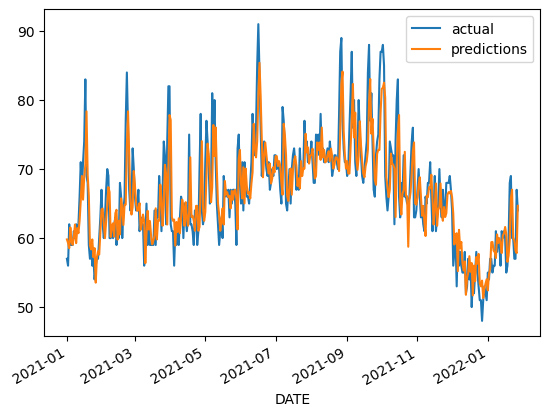

In [84]:
combined.plot()

In [85]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [86]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [87]:
core_weather = core_weather.iloc[30:,:].copy()

In [88]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [89]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

20.170663808991097

<Axes: xlabel='DATE'>

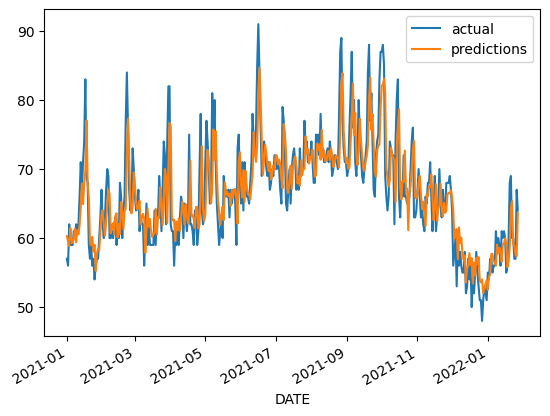

In [90]:
combined.plot()